In [1]:
import gym
import warnings
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm, trange
from cryoenv.mqtt import SoftActorCritic, ReturnTracker, HistoryWriter
%config InlineBackend.figure_formats = ['svg']

In [2]:
np.random.seed(5)

In [3]:
torch.cuda.is_available()

False

In [4]:
warnings.simplefilter('ignore')
gym.logger.set_level(40)

In [5]:
buffer_size = 1000

env = gym.make('cryoenv:cryoenv-sig-v0',
                   omega=0,
                   sample_pars=False,
                   log_reward=False,
                   rand_start=False,
                   pars={'store_raw': False,
                         'max_buffer_len': buffer_size,
                         'tpa_queue': [1,5,10],
                         'pileup_prob': 0.,
                         'xi': np.array([1e2]),
                         'tau': np.array([45]), 
                         'tp_interval': 10},
               render_mode='human',
                   )

In [6]:
obs, info = env.reset()

In [7]:
model = SoftActorCritic(env, policy = "GaussianPolicy", critic = "QNetwork", lr=1e-2, buffer_size=buffer_size, learning_starts=0,
                        batch_size=16, gamma=.9, gradient_steps=10, grad_clipping=.5, tau=0.05, 
                        device='cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
tracker = ReturnTracker()
writer = HistoryWriter()

In [9]:
model.learn(episodes = 5, 
            episode_steps = 40, 
            two_pbars=True,
            tracker=tracker,
            writer=writer)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

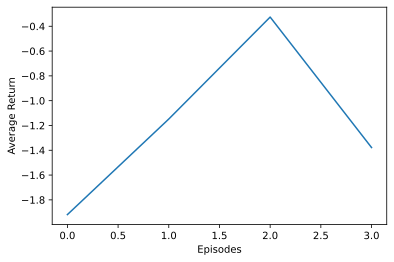

In [10]:
tracker.plot(smooth=1)

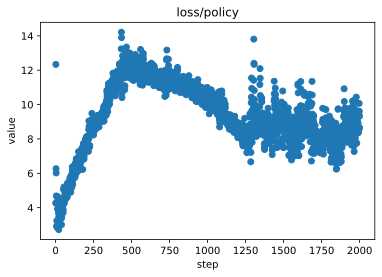

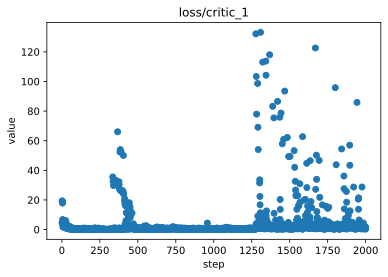

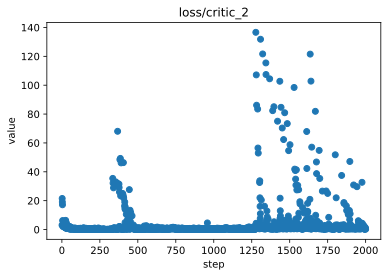

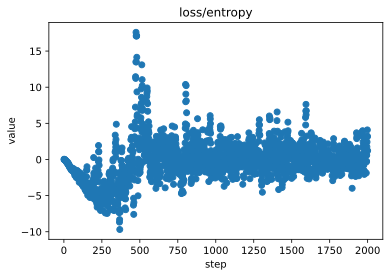

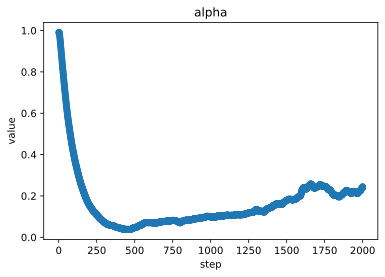

In [11]:
for key in writer.history.keys():
    writer.plot(key)

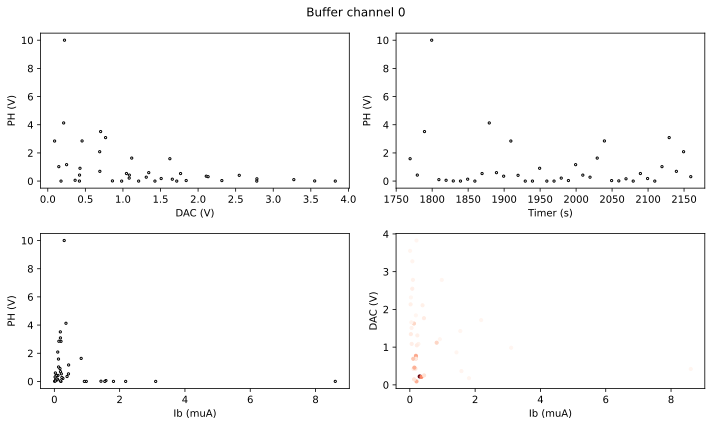

In [12]:
env.detector.plot_buffer()

  0%|          | 0/10 [00:00<?, ?it/s]

[[-0.41896966 -0.9813699 ]]
[-0.99367727 -0.99998698 -0.98136991 -0.41896963 -0.6       ] -0.0020589719591114206


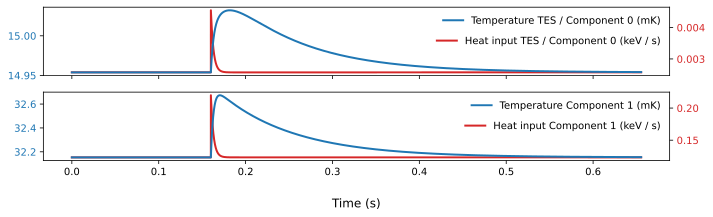

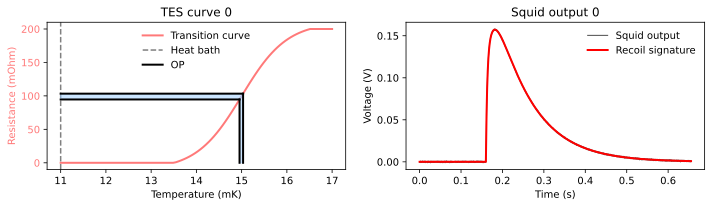

[[-0.44322917 -0.9790494 ]]
[-0.97592524 -0.99998726 -0.97904938 -0.4432292   1.        ] -0.0026454748116071652


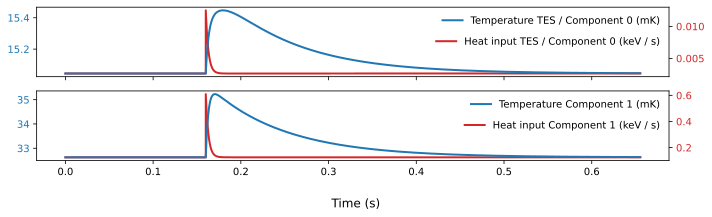

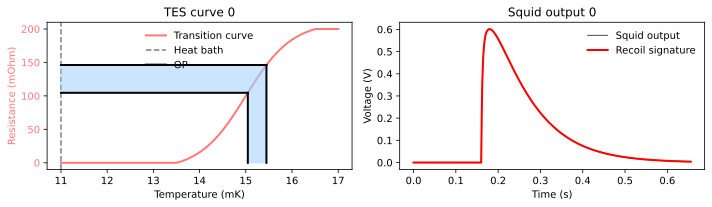

[[-0.45605183 -0.9873118 ]]
[-0.97985207 -0.99998781 -0.98731178 -0.45605183  3.        ] -0.006048828243457606


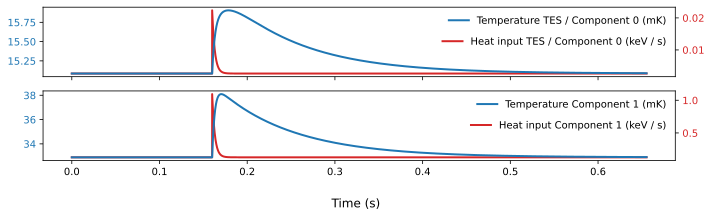

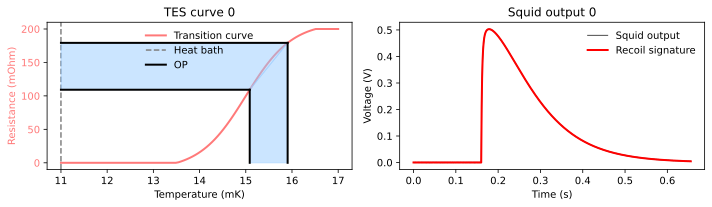

[[ 0.04707795 -0.9661258 ]]
[-0.99778665 -0.99998929 -0.96612579  0.04707789 -0.6       ] -0.004837513891497339


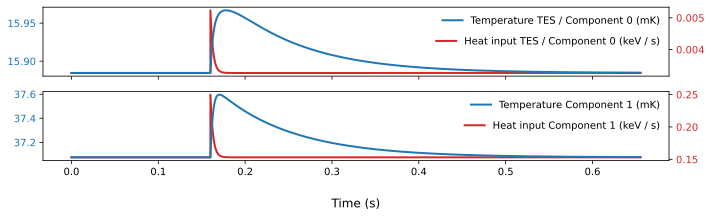

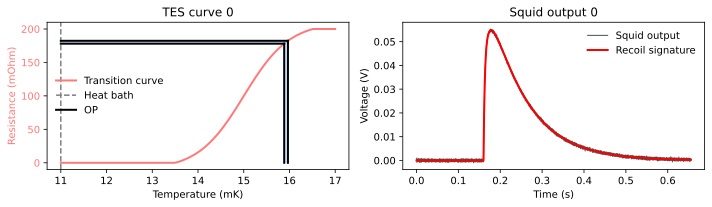

[[-0.4450657 -0.9734649]]
[-0.9921086  -0.99998918 -0.97346491 -0.44506574  1.        ] -0.0068547512216451945


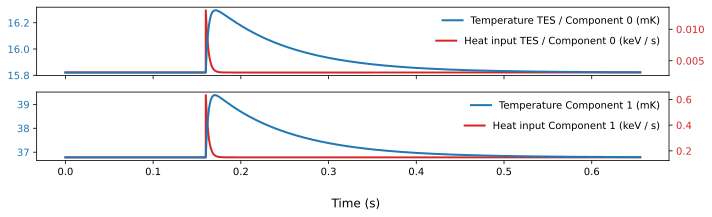

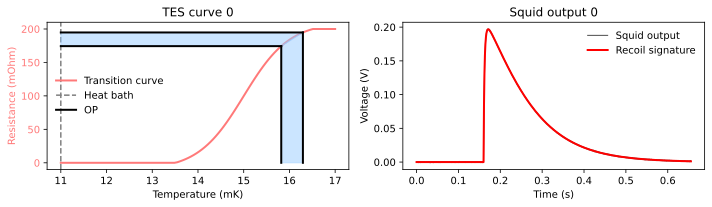

[[-0.45692244 -0.9871909 ]]
[-0.99367165 -0.99998898 -0.9871909  -0.45692241  3.        ] -0.0174202606185627


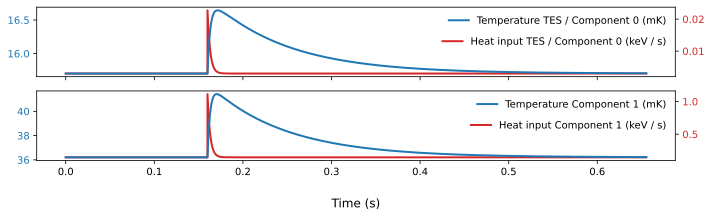

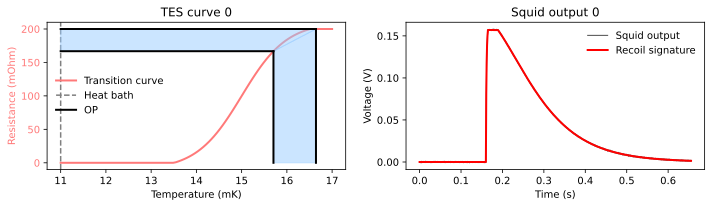

[[ 0.04300258 -0.96596533]]
[-0.99903327 -0.99998948 -0.96596533  0.04300261 -0.6       ] -0.010882793537332972


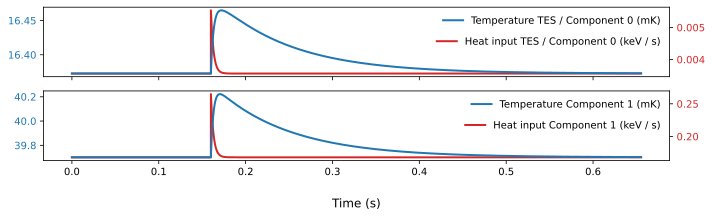

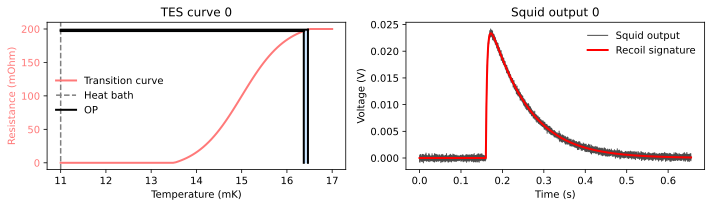

[[-0.4449436  -0.97348446]]
[-0.99727332 -0.99998944 -0.97348446 -0.44494361  1.        ] -0.01935947063448773


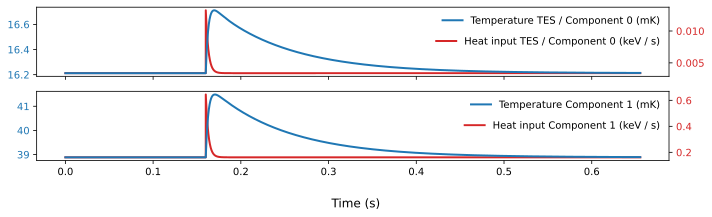

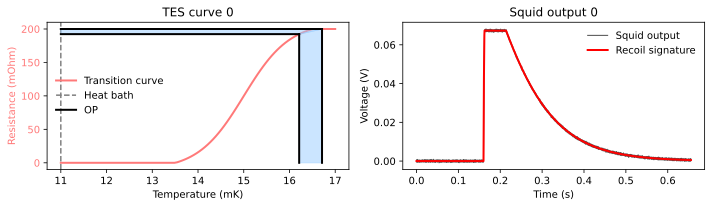

[[-0.45712656 -0.9871609 ]]
[-0.99729763 -0.99998926 -0.98716092 -0.45712656  3.        ] -0.0397548003280224


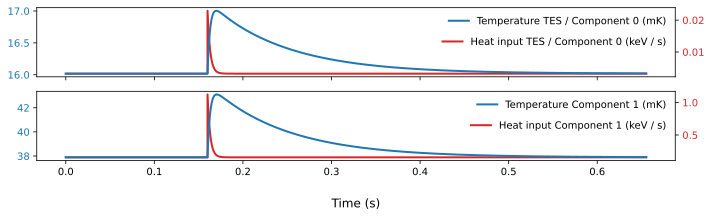

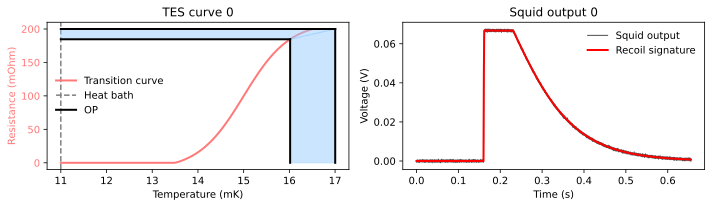

[[ 0.04189935 -0.9659223 ]]
[-0.99996013 -0.99998929 -0.9659223   0.04189932 -0.6       ] -0.26850524869238385


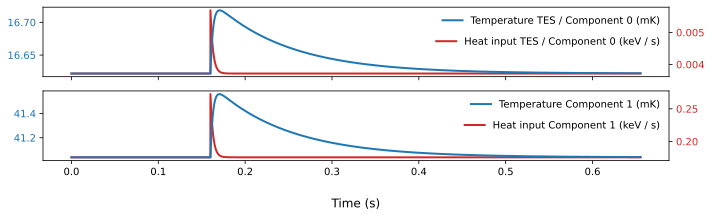

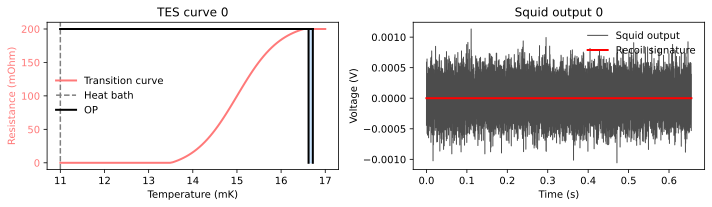

In [13]:
obs, _ = env.reset()
model.policy.eval()
returns = 0
for i in trange(10):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action.flatten())
    print(action)
    print(obs, reward)
    returns += reward
    env.render()
    if terminated or truncated:
        obs, _ = env.reset()

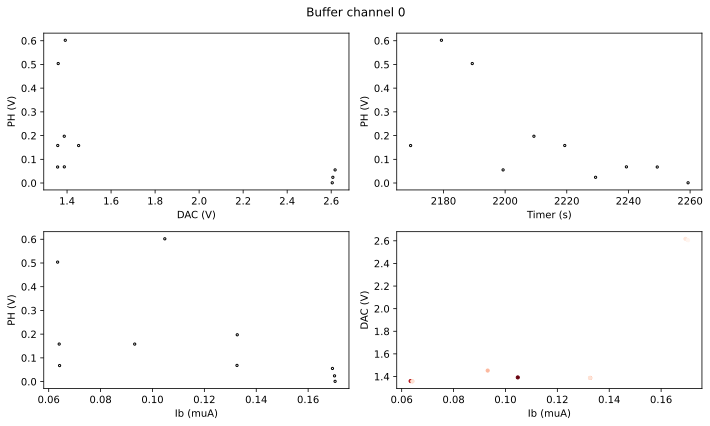

In [14]:
env.detector.plot_buffer()

In [15]:
# env.close()

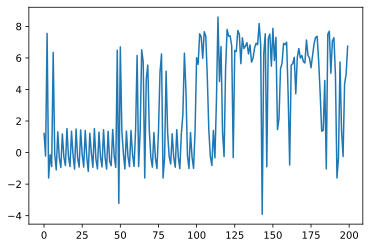

In [18]:
plt.plot(- np.log(- model.buffer.reward_memory[:200]))

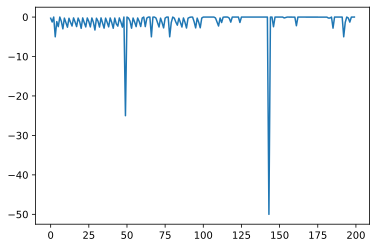

In [19]:
plt.plot(model.buffer.reward_memory[:200])